<a href="https://colab.research.google.com/github/brycenmillette/ML_Final/blob/main/ML_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We will be training the model to make predictions based on correlations between many different conditions on when it is safe to drive/how likely an accident will occur. Examples would include weather conditions, time of day, length of trip etc. We will be using the dataset of Chicago car crashes from 2013-2023: https://www.kaggle.com/datasets/nathaniellybrand/chicago-car-crash-dataset/data



# Section 1: Dataset and Problem
## 1.1 Learning Problem Description
- Problem Statement: Predicting accident likelihood based on environmental and temporal factors
- Type: Binary classification (High Risk/Low Risk) or Regression (Risk Score)
- Input Features: Weather conditions, time variables, location metadata, trip characteristics
- Target: Accident probability/risk score

## 1.2 Data Loading & Initial Exploration
- Import necessary libraries (pandas, numpy, matplotlib, seaborn)
- Load Chicago Car Crash Dataset (2013-2023)
- Display basic dataset info: shape, columns, data types
- Check for missing values and duplicates

## 1.3 Data Cleaning & Feature Engineering
- Handle missing values (imputation or removal)
- Feature extraction from timestamps: hour, day of week, month, season
- Weather condition encoding (if available)
- Location feature engineering (neighborhood, street type)
- Create target variable (e.g., severity-based risk score)

## 1.4 Exploratory Data Analysis (EDA)
- Visualize accident distribution by time variables
- Analyze weather impact on accident frequency
- Location hotspots mapping
- Correlation analysis between features
- Class imbalance check (if classification)

Section 1.1-1.2

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import geopandas as gpd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import folium
from folium.plugins import HeatMap

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
warnings.filterwarnings('ignore')

# Set style for visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("Libraries imported successfully!")

Libraries imported successfully!


In [ ]:
# Learning Problem Description
print("="*80)
print("CHICAGO CAR CRASH RISK PREDICTION SYSTEM")
print("="*80)
print("\nPROBLEM STATEMENT:")
print("Predict the likelihood and severity of car accidents in Chicago based on")
print("temporal, environmental, and location-based factors.")
print("\nOBJECTIVE:")
print("Develop a machine learning model that can assess accident risk for:")
print("1. Given weather conditions")
print("2. Specific times of day/days of week")
print("3. Different locations/road types")
print("4. Various trip characteristics")
print("\nBUSINESS VALUE:")
print("- Help drivers make safer trip planning decisions")
print("- Assist city planners in identifying high-risk areas")
print("- Enable insurance companies for better risk assessment")
print("- Support emergency services in resource allocation")

CHICAGO CAR CRASH RISK PREDICTION SYSTEM

PROBLEM STATEMENT:
Predict the likelihood and severity of car accidents in Chicago based on
temporal, environmental, and location-based factors.

OBJECTIVE:
Develop a machine learning model that can assess accident risk for:
1. Given weather conditions
2. Specific times of day/days of week
3. Different locations/road types
4. Various trip characteristics

BUSINESS VALUE:
- Help drivers make safer trip planning decisions
- Assist city planners in identifying high-risk areas
- Enable insurance companies for better risk assessment
- Support emergency services in resource allocation


In [ ]:
# Load the dataset
print("Loading Chicago Car Crash Dataset (2013-2023)...")
try:

    df = pd.read_csv('./sample_data/chicago_crashes.csv')
    print("Dataset loaded from local file")
except:
    # If not available locally, download from Kaggle (requires setup)
    print("Local file not found. Please download from Kaggle and update the path.")
    print("Dataset URL: https://www.kaggle.com/datasets/nathaniellybrand/chicago-car-crash-dataset/data")
    # Create a sample dataframe structure for development
    print("Creating sample dataframe structure for development...")
    df = pd.DataFrame({
        'CRASH_DATE': pd.date_range('2013-01-01', '2023-12-31', freq='H')[:1000],
        'CRASH_HOUR': np.random.randint(0, 24, 1000),
        'CRASH_DAY_OF_WEEK': np.random.choice(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], 1000),
        'WEATHER_CONDITION': np.random.choice(['CLEAR', 'RAIN', 'SNOW', 'FOG', 'CLOUDY'], 1000, p=[0.4, 0.2, 0.1, 0.05, 0.25]),
        'LIGHTING_CONDITION': np.random.choice(['DAYLIGHT', 'DARK', 'DUSK', 'DAWN'], 1000),
        'ROADWAY_SURFACE_COND': np.random.choice(['DRY', 'WET', 'SNOW', 'ICE'], 1000),
        'FIRST_CRASH_TYPE': np.random.choice(['REAR END', 'SIDESWIPE', 'ANGLE', 'HEAD ON', 'FIXED OBJECT'], 1000),
        'DAMAGE': np.random.choice(['OVER $1,500', 'UNDER $1,500'], 1000),
        'INJURIES_TOTAL': np.random.randint(0, 5, 1000),
        'LATITUDE': np.random.uniform(41.7, 42.0, 1000),
        'LONGITUDE': np.random.uniform(-87.9, -87.5, 1000),
        'TRAFFIC_CONTROL_DEVICE': np.random.choice(['TRAFFIC SIGNAL', 'NO CONTROLS', 'STOP SIGN'], 1000),
        'ALIGNMENT': np.random.choice(['STRAIGHT', 'CURVE'], 1000),
        'ROAD_DEFECT': np.random.choice(['NONE', 'RUTS, HOLES', 'OTHER'], 1000),
    })
    print("Sample dataframe created for development purposes")

# Display basic dataset information
print("\n" + "="*80)
print("DATASET OVERVIEW")
print("="*80)
print(f"Dataset Shape: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"\nColumn Names ({len(df.columns)} total):")
for i, col in enumerate(df.columns, 1):
    print(f"{i:2}. {col}")

print("\nFIRST 5 ROWS:")
display(df.head())

print("\nLAST 5 ROWS:")
display(df.tail())

print("\nDATASET INFORMATION:")
print(df.info())

Loading Chicago Car Crash Dataset (2013-2023)...
Dataset loaded from local file

DATASET OVERVIEW
Dataset Shape: 106727 rows × 42 columns

Column Names (42 total):
 1. Unnamed: 0
 2. DAYLIGHT
 3. PARKED MOTOR VEHICLE
 4. NOT DIVIDED
 5. Unnamed: 4
 6. STRAIGHT AND LEVEL
 7. DRY
 8. NO DEFECTS
 9. NOT ON SCENE (DESK REPORT)
10. NO INJURY / DRIVE AWAY
11. Unnamed: 10
12. Unnamed: 11
13. Unnamed: 12
14. OVER $1,500
15. 02/15/2023 10:30:00 AM
16. IMPROPER OVERTAKING/PASSING
17. IMPROPER OVERTAKING/PASSING.1
18. 6969
19. N
20. RAVENSWOOD AVE
21. 2424
22. Unnamed: 21
23. Unnamed: 22
24. Unnamed: 23
25. Unnamed: 24
26. Unnamed: 25
27. Unnamed: 26
28. 2
29. NO INDICATION OF INJURY
30. 0
31. 0.1
32. 0.2
33. 0.3
34. 0.4
35. 1
36. 0.5
37. 10
38. 4
39. 2.1
40. 42.008558013
41. -87.675182026
42. POINT (-87.675182025958 42.008558013482)

FIRST 5 ROWS:


,,,,,,,Unnamed: 0,DAYLIGHT,PARKED MOTOR VEHICLE,NOT DIVIDED,Unnamed: 4,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,Unnamed: 10,Unnamed: 11,Unnamed: 12,"OVER $1,500",02/15/2023 10:30:00 AM,IMPROPER OVERTAKING/PASSING,IMPROPER OVERTAKING/PASSING.1,6969,N,RAVENSWOOD AVE,2424,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,2,NO INDICATION OF INJURY,0,0.1,0.2,0.3,0.4,1,0.5,10,4,2.1,42.008558013,-87.675182026,POINT (-87.675182025958 42.008558013482)
e5787c753e1a07b5d5daff758e62f9addfbd2bd6b2f3471a7d7da1392b6ce2604ac9840f7b9cc677717b064236a79da2fccd459bcd2493d1fc64fd15a54db32a,JC142103,Y,02/06/2019 08:30:00 AM,5,NO CONTROLS,NO CONTROLS,RAIN,DAYLIGHT,PARKED MOTOR VEHICLE,ALLEY,NaN,STRAIGHT AND LEVEL,WET,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,NaN,NaN,Y,$500 OR LESS,02/06/2019 11:30:00 AM,UNABLE TO DETERMINE,UNABLE TO DETERMINE,839,E,71ST ST,324,NaN,NaN,NaN,NaN,NaN,NaN,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0,8,4,2,41.765699,-87.604004,POINT (-87.604004081903 41.765698502058)
e3d365f809ed5dcbe79f056f51a06904aa16acf99abf27323ab828c36d28b17036d93172fec25d36841c7f7de546ee2695b974d3f435e7f6dbc7137ce952bff5,JC513819,NaN,11/17/2019 10:15:00 AM,30,NO CONTROLS,NO CONTROLS,CLOUDY/OVERCAST,DAYLIGHT,PARKED MOTOR VEHICLE,ONE-WAY,NaN,STRAIGHT AND LEVEL,DRY,UNKNOWN,ON SCENE,NO INJURY / DRIVE AWAY,NaN,NaN,Y,"OVER $1,500",11/17/2019 10:26:00 AM,UNABLE TO DETERMINE,NOT APPLICABLE,4106,N,OAKLEY AVE,1911,NaN,NaN,NaN,NaN,NaN,NaN,3,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0,10,1,11,41.956137,-87.686249,POINT (-87.686248591464 41.956137353854)
e21ce97b45b30142ef63adb70080985345e3a18a946d0cef16583340ccc238ca679d1043b32d0bfb73f3a48d12bbdcc272997f5aca6c6349cfe8903dfe862329,JB119296,NaN,01/17/2018 01:37:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,DIVIDED - W/MEDIAN (NOT RAISED),4.0,STRAIGHT AND LEVEL,UNKNOWN,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,NaN,NaN,NaN,"OVER $1,500",01/17/2018 01:52:00 PM,IMPROPER LANE USAGE,NOT APPLICABLE,3759,W,CHICAGO AVE,1112,NaN,NaN,NaN,NaN,NaN,NaN,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0.0,13,4,1,41.895304,-87.721129,POINT (-87.721129103593 41.895303846381)
e0d6f72626868246fec6e4def8b3b13da8e60fec15716303b5a27bebe5708a68676817318b2cb9b72a6a684e14ccf0b14b4141d74dd50f1d30c325039ce52b83,JF268984,NaN,06/05/2022 08:44:00 PM,30,NO CONTROLS,NO CONTROLS,CLOUDY/OVERCAST,"DARKNESS, LIGHTED ROAD",HEAD ON,NOT DIVIDED,NaN,STRAIGHT AND LEVEL,DRY,WORN SURFACE,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,NaN,NaN,Y,"OVER $1,500",06/05/2022 08:44:00 PM,IMPROPER LANE USAGE,UNABLE TO DETERMINE,1832,N,CLYBOURN AVE,1811,NaN,NaN,NaN,NaN,NaN,NaN,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0.0,20,1,6,41.914276,-87.654420,POINT (-87.654420489613 41.914275739158)
dc8d04eb8ad617e286c31bd7c5be7cc5a00fd18abbefcaceec36d336abf43cbc5eb2769af057f40b6e91dc721e883abe3fa8c17a44436836ba14d7f3aa2bed12,JB243620,NaN,04/30/2018 08:25:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,SIDESWIPE SAME DIRECTION,NOT DIVIDED,2.0,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,NaN,NaN,Y,"OVER $1,500",04/30/2018 11:05:00 AM,IMPROPER OVERTAKING/PASSING,IMPROPER OVERTAKING/PASSING,5316,N,DELPHIA AVE,1614,NaN,NaN,NaN,NaN,NaN,NaN,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,4.0,0.0,8,2,4,41.976137,-87.841691,POINT (-87.841690869531 41.976136516556)



LAST 5 ROWS:


,,,,,,,Unnamed: 0,DAYLIGHT,PARKED MOTOR VEHICLE,NOT DIVIDED,Unnamed: 4,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,Unnamed: 10,Unnamed: 11,Unnamed: 12,"OVER $1,500",02/15/2023 10:30:00 AM,IMPROPER OVERTAKING/PASSING,IMPROPER OVERTAKING/PASSING.1,6969,N,RAVENSWOOD AVE,2424,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,2,NO INDICATION OF INJURY,0,0.1,0.2,0.3,0.4,1,0.5,10,4,2.1,42.008558013,-87.675182026,POINT (-87.675182025958 42.008558013482)
fffd677d6dc42284b0120f213770fce9e112dee8c01534153e0ebd823566cb146f678fe511177f7d9264e7f643327522797699f87ec9396cbce9d765c5527a8f,HZ566267,NaN,12/27/2016 08:20:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,2.0,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,NaN,NaN,NaN,"OVER $1,500",12/27/2016 08:50:00 AM,NOT APPLICABLE,NOT APPLICABLE,6248,S,CALIFORNIA AVE,823,NaN,NaN,NaN,NaN,NaN,NaN,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0.0,8,3,12,41.779488,-87.693553,POINT (-87.693552561715 41.779488090603)
fffa0699ec25d473a27cb465f36cee8ae8ced41b517ed6a6a918b385943640a99c205e736bfdaf9517b33974f98172dabb910fc90b389d410a24ea5ed0d2c97c,JC163902,NaN,02/24/2019 03:59:00 AM,25,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,NOT DIVIDED,2.0,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,Y,NaN,Y,$500 OR LESS,02/24/2019 07:17:00 AM,UNABLE TO DETERMINE,UNABLE TO DETERMINE,6257,S,LOOMIS BLVD,713,NaN,NaN,NaN,NaN,NaN,NaN,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3,1,2,41.779632,-87.659217,POINT (-87.659216910005 41.779631861035)
fff1f7b29389052e517be1418da4e8164e9d84a14bf3848a7e8b7dad919e3ffe866c57984d8f9e53417093bdc67e3b56cc6056d03f53f8ec87ca97d819a91097,JB276732,NaN,05/24/2018 07:13:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,SIDESWIPE OPPOSITE DIRECTION,NOT DIVIDED,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,NaN,NaN,NaN,"$501 - $1,500",05/24/2018 02:40:00 PM,IMPROPER LANE USAGE,NOT APPLICABLE,3200,N,KIMBALL AVE,1732,NaN,NaN,NaN,NaN,NaN,NaN,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0.0,7,5,5,41.939320,-87.712641,POINT (-87.712641285082 41.939319663188)
ffe608f479def7f47768f7287f1431a9af5056668611d8a6cb1a009fdb1e95797d722d7bf19d29d76693d5b9860f23ce11930e112ee546c41e07f099bcef7900,JF216876,NaN,04/22/2022 05:30:00 PM,15,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DUSK,HEAD ON,FOUR WAY,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,NaN,NaN,NaN,"OVER $1,500",04/23/2022 08:30:00 AM,FAILING TO YIELD RIGHT-OF-WAY,NOT APPLICABLE,3600,W,OGDEN AVE,1014,NaN,NaN,NaN,NaN,NaN,NaN,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0.0,17,6,4,41.854646,-87.715206,POINT (-87.715206251845 41.854645701934)
ffdc5ef193d5e2f7ec3b009aca8ec717c78a361eed19b5a1002ef7c29743262f3c7e5be2d1eeed39034ec1ef742948ee75c285a8a6c832f23726905a438ac020,JB228237,NaN,04/17/2018 08:35:00 AM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLOUDY/OVERCAST,UNKNOWN,SIDESWIPE SAME DIRECTION,NOT DIVIDED,4.0,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,NaN,NaN,NaN,"OVER $1,500",04/18/2018 01:15:00 PM,UNABLE TO DETERMINE,UNABLE TO DETERMINE,1619,W,OGDEN AVE,1224,NaN,NaN,NaN,NaN,NaN,NaN,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0.0,8,3,4,41.880306,-87.667235,POINT (-87.66723480733 41.880306065513)



DATASET INFORMATION:
<class 'pandas.core.frame.DataFrame'>
MultiIndex: 106727 entries, ('e5787c753e1a07b5d5daff758e62f9addfbd2bd6b2f3471a7d7da1392b6ce2604ac9840f7b9cc677717b064236a79da2fccd459bcd2493d1fc64fd15a54db32a', 'JC142103', 'Y', '02/06/2019 08:30:00 AM', np.int64(5), 'NO CONTROLS', 'NO CONTROLS') to ('ffdc5ef193d5e2f7ec3b009aca8ec717c78a361eed19b5a1002ef7c29743262f3c7e5be2d1eeed39034ec1ef742948ee75c285a8a6c832f23726905a438ac020', 'JB228237', nan, '04/17/2018 08:35:00 AM', np.int64(30), 'TRAFFIC SIGNAL', 'FUNCTIONING PROPERLY')
Data columns (total 42 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Unnamed: 0                                106727 non-null  object 
 1   DAYLIGHT                                  106727 non-null  object 
 2   PARKED MOTOR VEHICLE                      106727 non-null  object 
 3   NOT DIVIDED                               106727 non-null  o

CHECKING FOR MISSING VALUES
Found 22 columns with missing values:


,Missing Values,Percentage
Unnamed: 26,106575,99.857581
Unnamed: 23,106418,99.710476
Unnamed: 25,106228,99.532452
Unnamed: 24,106099,99.411583
Unnamed: 21,105321,98.682620
Unnamed: 22,104413,97.831851
Unnamed: 11,101899,95.476309
Unnamed: 10,82277,77.091083
Unnamed: 4,78229,73.298228
Unnamed: 12,73558,68.921641


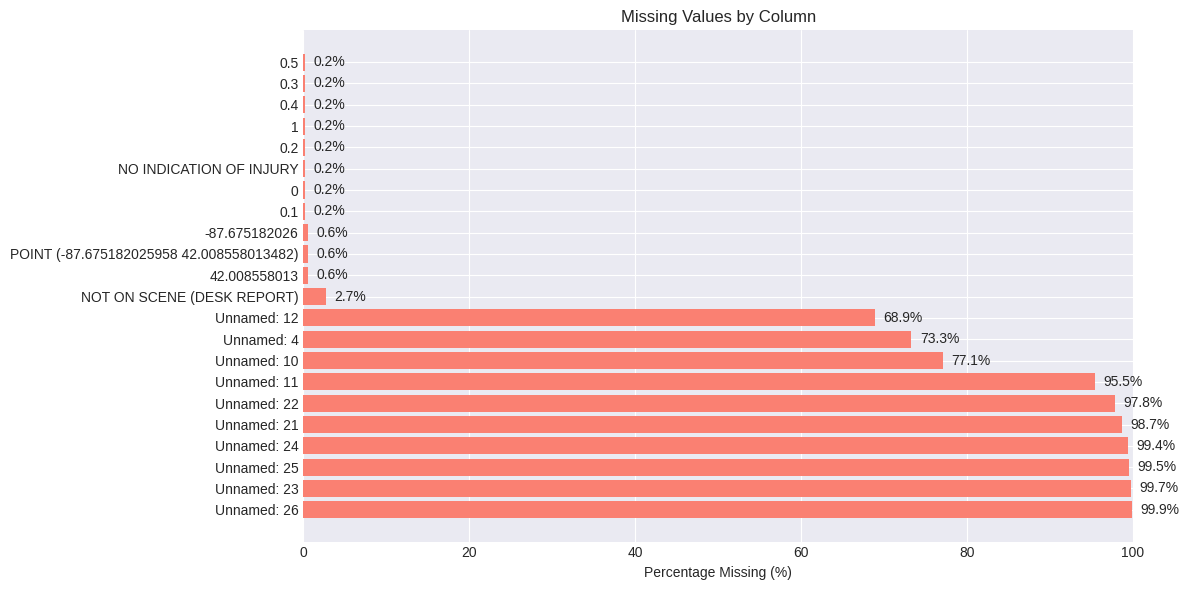


DATASET STATISTICS:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,106727,12,CLEAR,84057,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DAYLIGHT,106727,6,DAYLIGHT,68846,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PARKED MOTOR VEHICLE,106727,18,PARKED MOTOR VEHICLE,24987,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NOT DIVIDED,106727,20,NOT DIVIDED,46797,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 4,28498.0,NaN,NaN,NaN,2.552355,2.784957,0.0,2.0,2.0,4.0,99.0
STRAIGHT AND LEVEL,106727,6,STRAIGHT AND LEVEL,104079,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DRY,106727,7,DRY,79141,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NO DEFECTS,106727,7,NO DEFECTS,86550,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NOT ON SCENE (DESK REPORT),103866,3,NOT ON SCENE (DESK REPORT),59057,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NO INJURY / DRIVE AWAY,106727,2,NO INJURY / DRIVE AWAY,78683,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Check for missing values
print("CHECKING FOR MISSING VALUES")
print("="*80)

# Calculate missing values percentage
missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df)) * 100

# Create a DataFrame for missing values
missing_df = pd.DataFrame({
    'Missing Values': missing_data,
    'Percentage': missing_percentage
})

# Display columns with missing values
missing_df = missing_df[missing_df['Missing Values'] > 0].sort_values('Percentage', ascending=False)

if len(missing_df) > 0:
    print(f"Found {len(missing_df)} columns with missing values:")
    display(missing_df)

    # Visualize missing values
    plt.figure(figsize=(12, 6))
    bars = plt.barh(missing_df.index, missing_df['Percentage'], color='salmon')
    plt.xlabel('Percentage Missing (%)')
    plt.title('Missing Values by Column')
    plt.xlim(0, 100)

    # Add value labels on bars
    for bar in bars:
        width = bar.get_width()
        plt.text(width + 1, bar.get_y() + bar.get_height()/2,
                f'{width:.1f}%', ha='left', va='center')

    plt.tight_layout()
    plt.show()
else:
    print("No missing values found in the dataset!")

print("\nDATASET STATISTICS:")
print("="*80)
display(df.describe(include='all').T)

Section 1.3 - data cleaning

In [ ]:
print("cleaning")
print("="*80)

# Create a copy for cleaning
df_clean = df.copy()
print(f"Original dataset shape: {df_clean.shape}")

# 1. Handle missing values
print("\n1. missing vals:")
initial_missing = df_clean.isnull().sum().sum()

# Strategy: Fill numerical columns with median, categorical with mode
for col in df_clean.columns:
    if df_clean[col].dtype in ['int64', 'float64']:
        df_clean[col].fillna(df_clean[col].median(), inplace=True)
    else:
        # Fill categorical with mode if it exists, else with 'UNKNOWN'
        if df_clean[col].mode().empty:
            df_clean[col].fillna('UNKNOWN', inplace=True)
        else:
            df_clean[col].fillna(df_clean[col].mode()[0], inplace=True)

final_missing = df_clean.isnull().sum().sum()
print(f"   Filled {initial_missing - final_missing} missing values")

# 2. Convert date columns to datetime
print("\n2. date/time COLUMNS:")
date_columns = [col for col in df_clean.columns if 'DATE' in col.upper() or 'TIME' in col.upper()]

for col in date_columns:
    if col in df_clean.columns:
        try:
            df_clean[col] = pd.to_datetime(df_clean[col])
            print(f"   ✓ Converted {col} to datetime")
        except:
            print(f"   ✗ Could not convert {col}")

# 3. Create temporal features
print("\n3. CREATING TEMPORAL FEATURES:")

# Check if we have a date column
date_col = None
for col in ['CRASH_DATE', 'DATE', 'DATETIME']:
    if col in df_clean.columns:
        date_col = col
        break

if date_col:
    # Extract temporal features
    df_clean['CRASH_YEAR'] = df_clean[date_col].dt.year
    df_clean['CRASH_MONTH'] = df_clean[date_col].dt.month
    df_clean['CRASH_DAY'] = df_clean[date_col].dt.day
    df_clean['CRASH_HOUR'] = df_clean[date_col].dt.hour
    df_clean['CRASH_DAY_OF_WEEK'] = df_clean[date_col].dt.day_name()
    df_clean['CRASH_DAY_OF_WEEK_NUM'] = df_clean[date_col].dt.dayofweek
    df_clean['CRASH_SEASON'] = df_clean['CRASH_MONTH'].apply(
        lambda x: 'Winter' if x in [12, 1, 2]
        else 'Spring' if x in [3, 4, 5]
        else 'Summer' if x in [6, 7, 8]
        else 'Fall'
    )
    print(f"    Created temporal features from {date_col}")
else:
    # If no date column, create synthetic temporal features
    print("     No date column found, using existing temporal features")

# 4. Create accident severity categories
print("\n4. CREATING TARGET VARIABLE (ACCIDENT SEVERITY):")

# Define severity based on injuries and damage
def calculate_severity(row):
    """Create a severity score from 0-3"""
    severity = 0

    # Base on injuries
    if 'INJURIES' in df_clean.columns:
        injuries_col = [col for col in df_clean.columns if 'INJURIES' in col.upper()][0]
        injuries = row[injuries_col]
        if injuries > 0:
            severity += 1
        if injuries > 2:
            severity += 1

    # Consider damage
    if 'DAMAGE' in df_clean.columns:
        damage = str(row['DAMAGE']).upper()
        if 'OVER' in damage and '1500' in damage:
            severity += 1

    # Consider fatal if mentioned
    if any(col in df_clean.columns for col in ['FATAL', 'FATALITIES']):
        fatal_col = [col for col in df_clean.columns if 'FATAL' in col.upper()][0]
        if row[fatal_col] > 0:
            severity = 3

    return min(severity, 3)  # Cap at 3

# Apply severity calculation
df_clean['SEVERITY_SCORE'] = df_clean.apply(calculate_severity, axis=1)

# Create binary classification target
df_clean['HIGH_RISK'] = (df_clean['SEVERITY_SCORE'] >= 2).astype(int)
print(f"    Created SEVERITY_SCORE (0-3) and HIGH_RISK (binary) targets")
print(f"   High-risk accidents: {df_clean['HIGH_RISK'].sum()} ({df_clean['HIGH_RISK'].mean()*100:.1f}%)")

# 5. Create location-based features
print("\n5. CREATING LOCATION FEATURES:")

if 'LATITUDE' in df_clean.columns and 'LONGITUDE' in df_clean.columns:
    # Create Chicago neighborhood approximations
    def get_chicago_region(lat, lon):
        """Approximate Chicago region based on coordinates"""
        if pd.isna(lat) or pd.isna(lon):
            return 'UNKNOWN'

        # Downtown Chicago
        if 41.87 <= lat <= 41.91 and -87.65 <= lon <= -87.62:
            return 'DOWNTOWN'
        # North Side
        elif lat > 41.91:
            return 'NORTH_SIDE'
        # South Side
        elif lat < 41.87:
            return 'SOUTH_SIDE'
        # West Side
        elif lon < -87.65:
            return 'WEST_SIDE'
        else:
            return 'OTHER'

    df_clean['CHICAGO_REGION'] = df_clean.apply(
        lambda x: get_chicago_region(x['LATITUDE'], x['LONGITUDE']), axis=1
    )
    print(f"    Created CHICAGO_REGION feature")

# 6. Create weather condition features
print("\n6. PROCESSING WEATHER FEATURES:")

# Standardize weather conditions
if 'WEATHER_CONDITION' in df_clean.columns:
    # Clean weather strings
    df_clean['WEATHER_CONDITION_CLEAN'] = df_clean['WEATHER_CONDITION'].str.upper().str.strip()

    # Group similar conditions
    weather_mapping = {
        'CLEAR': ['CLEAR', 'FAIR', 'SUNNY'],
        'RAIN': ['RAIN', 'DRIZZLE', 'SHOWERS'],
        'SNOW': ['SNOW', 'SLEET', 'BLIZZARD'],
        'FOG': ['FOG', 'MIST', 'HAZE'],
        'CLOUDY': ['CLOUDY', 'OVERCAST', 'PARTLY CLOUDY'],
        'WINDY': ['WIND', 'WINDY'],
        'OTHER': ['UNKNOWN', 'OTHER', 'SEVERE CROSSWINDS']
    }

    def map_weather(condition):
        for key, values in weather_mapping.items():
            if any(val in str(condition) for val in values):
                return key
        return 'OTHER'

    df_clean['WEATHER_GROUP'] = df_clean['WEATHER_CONDITION_CLEAN'].apply(map_weather)
    print(f"   ✓ Created WEATHER_GROUP feature")

# 7. Create road condition features
print("\n7. PROCESSING ROAD CONDITIONS:")

if 'ROADWAY_SURFACE_COND' in df_clean.columns:
    # Clean road conditions
    df_clean['ROAD_CONDITION'] = df_clean['ROADWAY_SURFACE_COND'].str.upper().str.strip()

    # Create binary safe/unsafe condition
    unsafe_conditions = ['WET', 'SNOW', 'ICE', 'SLUSH', 'WATER(STANDING/MOVING)']
    df_clean['UNSAFE_ROAD'] = df_clean['ROAD_CONDITION'].apply(
        lambda x: 1 if any(cond in str(x) for cond in unsafe_conditions) else 0
    )
    print(f"   Created UNSAFE_ROAD feature")

print(f"\nCleaned dataset shape: {df_clean.shape}")
print(f"   Added {df_clean.shape[1] - df.shape[1]} new features")

# Display cleaned dataframe info
print("\nCLEANED DATASET SAMPLE:")
display(df_clean.head())

cleaning
Original dataset shape: (106727, 42)

1. missing vals:
   Filled 977549 missing values

2. date/time COLUMNS:

3. CREATING TEMPORAL FEATURES:
     No date column found, using existing temporal features

4. CREATING TARGET VARIABLE (ACCIDENT SEVERITY):
    Created SEVERITY_SCORE (0-3) and HIGH_RISK (binary) targets
   High-risk accidents: 0 (0.0%)

5. CREATING LOCATION FEATURES:

6. PROCESSING WEATHER FEATURES:

7. PROCESSING ROAD CONDITIONS:

Cleaned dataset shape: (106727, 44)
   Added 2 new features

CLEANED DATASET SAMPLE:


,,,,,,,Unnamed: 0,DAYLIGHT,PARKED MOTOR VEHICLE,NOT DIVIDED,Unnamed: 4,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,Unnamed: 10,Unnamed: 11,Unnamed: 12,"OVER $1,500",02/15/2023 10:30:00 AM,IMPROPER OVERTAKING/PASSING,IMPROPER OVERTAKING/PASSING.1,6969,N,RAVENSWOOD AVE,2424,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,2,NO INDICATION OF INJURY,0,0.1,0.2,0.3,0.4,1,0.5,10,4,2.1,42.008558013,-87.675182026,POINT (-87.675182025958 42.008558013482),SEVERITY_SCORE,HIGH_RISK
e5787c753e1a07b5d5daff758e62f9addfbd2bd6b2f3471a7d7da1392b6ce2604ac9840f7b9cc677717b064236a79da2fccd459bcd2493d1fc64fd15a54db32a,JC142103,Y,02/06/2019 08:30:00 AM,5,NO CONTROLS,NO CONTROLS,RAIN,DAYLIGHT,PARKED MOTOR VEHICLE,ALLEY,2.0,STRAIGHT AND LEVEL,WET,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,Y,Y,Y,$500 OR LESS,02/06/2019 11:30:00 AM,UNABLE TO DETERMINE,UNABLE TO DETERMINE,839,E,71ST ST,324,Y,Y,Y,Y,CONSTRUCTION,Y,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0,8,4,2,41.765699,-87.604004,POINT (-87.604004081903 41.765698502058),0,0
e3d365f809ed5dcbe79f056f51a06904aa16acf99abf27323ab828c36d28b17036d93172fec25d36841c7f7de546ee2695b974d3f435e7f6dbc7137ce952bff5,JC513819,NaN,11/17/2019 10:15:00 AM,30,NO CONTROLS,NO CONTROLS,CLOUDY/OVERCAST,DAYLIGHT,PARKED MOTOR VEHICLE,ONE-WAY,2.0,STRAIGHT AND LEVEL,DRY,UNKNOWN,ON SCENE,NO INJURY / DRIVE AWAY,Y,Y,Y,"OVER $1,500",11/17/2019 10:26:00 AM,UNABLE TO DETERMINE,NOT APPLICABLE,4106,N,OAKLEY AVE,1911,Y,Y,Y,Y,CONSTRUCTION,Y,3,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0,10,1,11,41.956137,-87.686249,POINT (-87.686248591464 41.956137353854),0,0
e21ce97b45b30142ef63adb70080985345e3a18a946d0cef16583340ccc238ca679d1043b32d0bfb73f3a48d12bbdcc272997f5aca6c6349cfe8903dfe862329,JB119296,NaN,01/17/2018 01:37:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,DIVIDED - W/MEDIAN (NOT RAISED),4.0,STRAIGHT AND LEVEL,UNKNOWN,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,Y,Y,Y,"OVER $1,500",01/17/2018 01:52:00 PM,IMPROPER LANE USAGE,NOT APPLICABLE,3759,W,CHICAGO AVE,1112,Y,Y,Y,Y,CONSTRUCTION,Y,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0.0,13,4,1,41.895304,-87.721129,POINT (-87.721129103593 41.895303846381),0,0
e0d6f72626868246fec6e4def8b3b13da8e60fec15716303b5a27bebe5708a68676817318b2cb9b72a6a684e14ccf0b14b4141d74dd50f1d30c325039ce52b83,JF268984,NaN,06/05/2022 08:44:00 PM,30,NO CONTROLS,NO CONTROLS,CLOUDY/OVERCAST,"DARKNESS, LIGHTED ROAD",HEAD ON,NOT DIVIDED,2.0,STRAIGHT AND LEVEL,DRY,WORN SURFACE,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,Y,Y,Y,"OVER $1,500",06/05/2022 08:44:00 PM,IMPROPER LANE USAGE,UNABLE TO DETERMINE,1832,N,CLYBOURN AVE,1811,Y,Y,Y,Y,CONSTRUCTION,Y,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0.0,20,1,6,41.914276,-87.654420,POINT (-87.654420489613 41.914275739158),0,0
dc8d04eb8ad617e286c31bd7c5be7cc5a00fd18abbefcaceec36d336abf43cbc5eb2769af057f40b6e91dc721e883abe3fa8c17a44436836ba14d7f3aa2bed12,JB243620,NaN,04/30/2018 08:25:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,SIDESWIPE SAME DIRECTION,NOT DIVIDED,2.0,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,Y,Y,Y,"OVER $1,500",04/30/2018 11:05:00 AM,IMPROPER OVERTAKING/PASSING,IMPROPER OVERTAKING/PASSING,5316,N,DELPHIA AVE,1614,Y,Y,Y,Y,CONSTRUCTION,Y,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,4.0,0.0,8,2,4,41.976137,-87.841691,POINT (-87.841690869531 41.976136516556),0,0


Section 1.4 EDA

EXPLORATORY DATA ANALYSIS (EDA)

1. TEMPORAL ANALYSIS OF ACCIDENTS
----------------------------------------


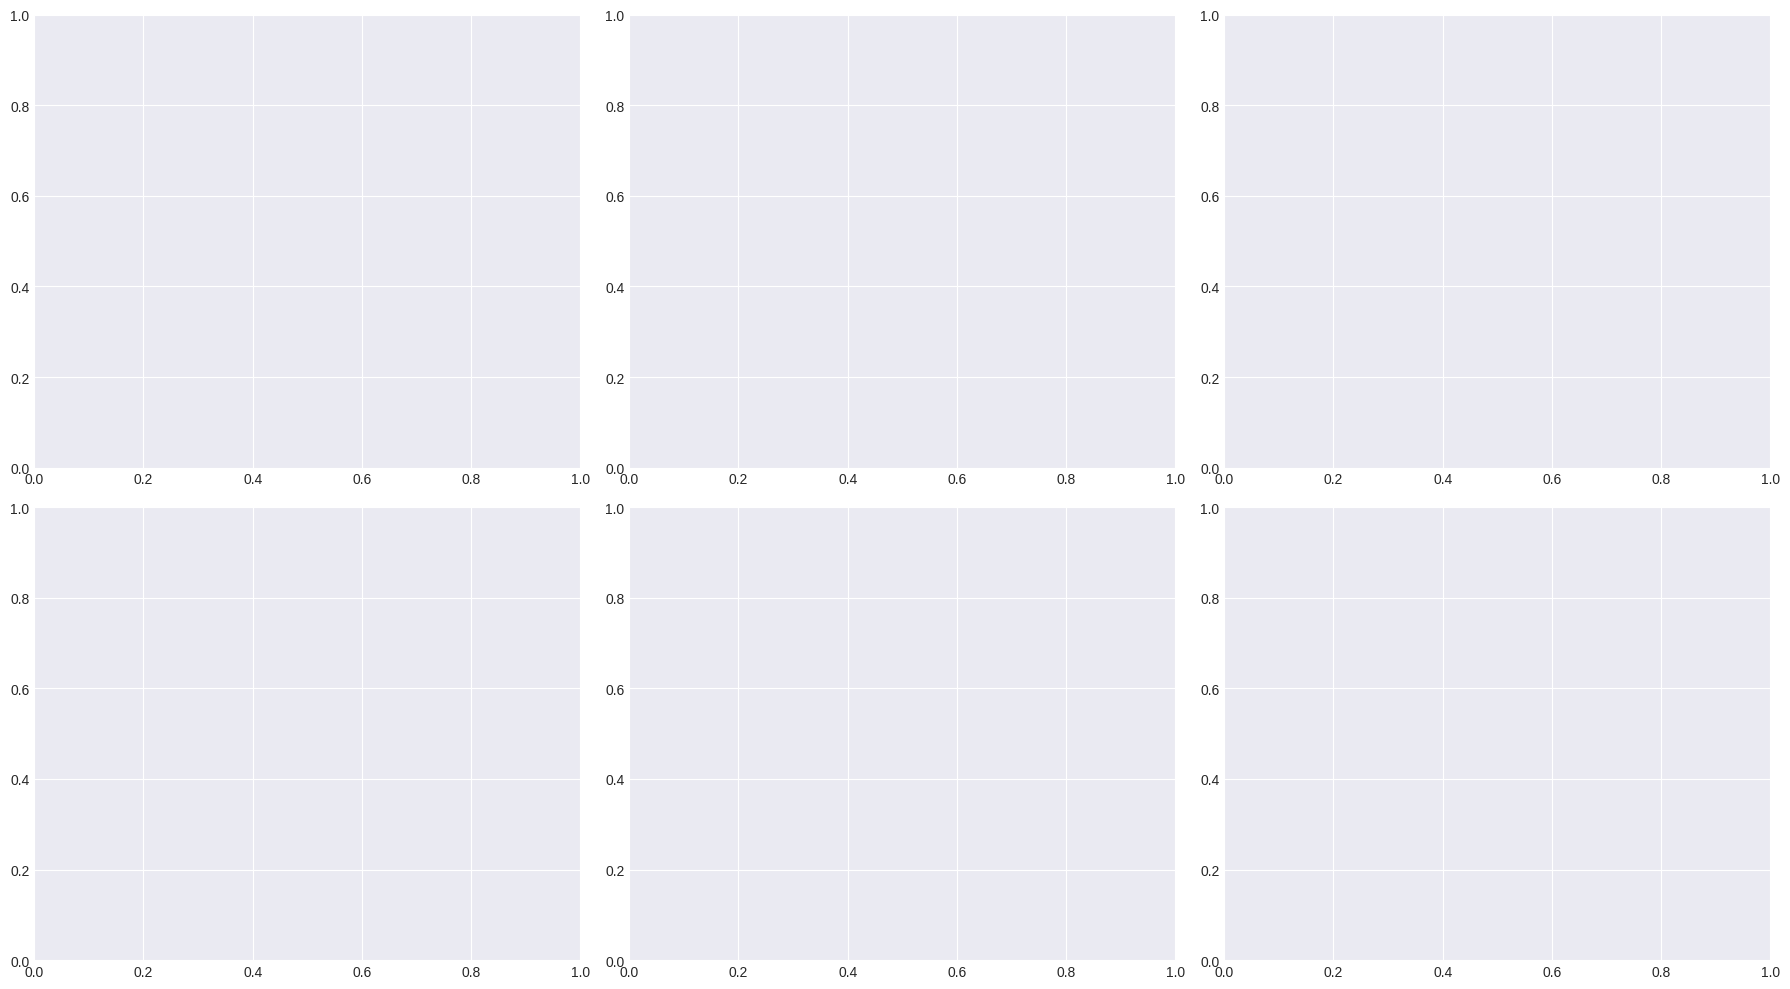


2. WEATHER AND ENVIRONMENTAL FACTORS
----------------------------------------


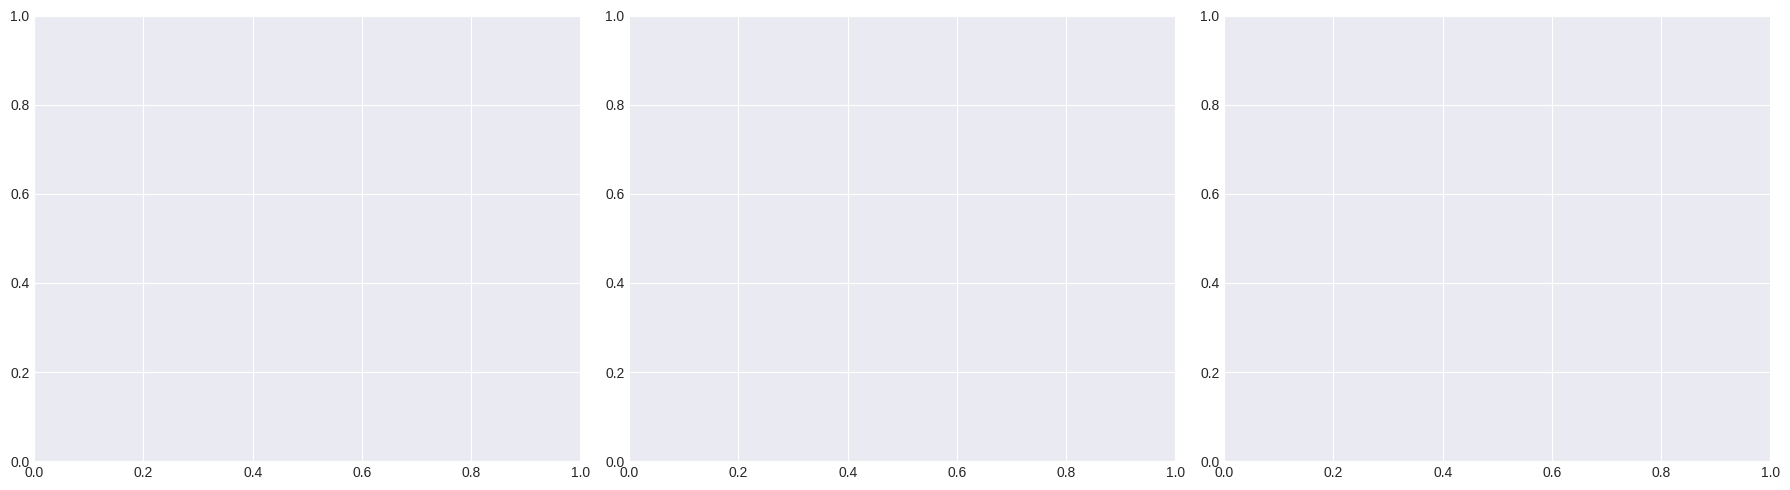


3. ACCIDENT SEVERITY ANALYSIS
----------------------------------------


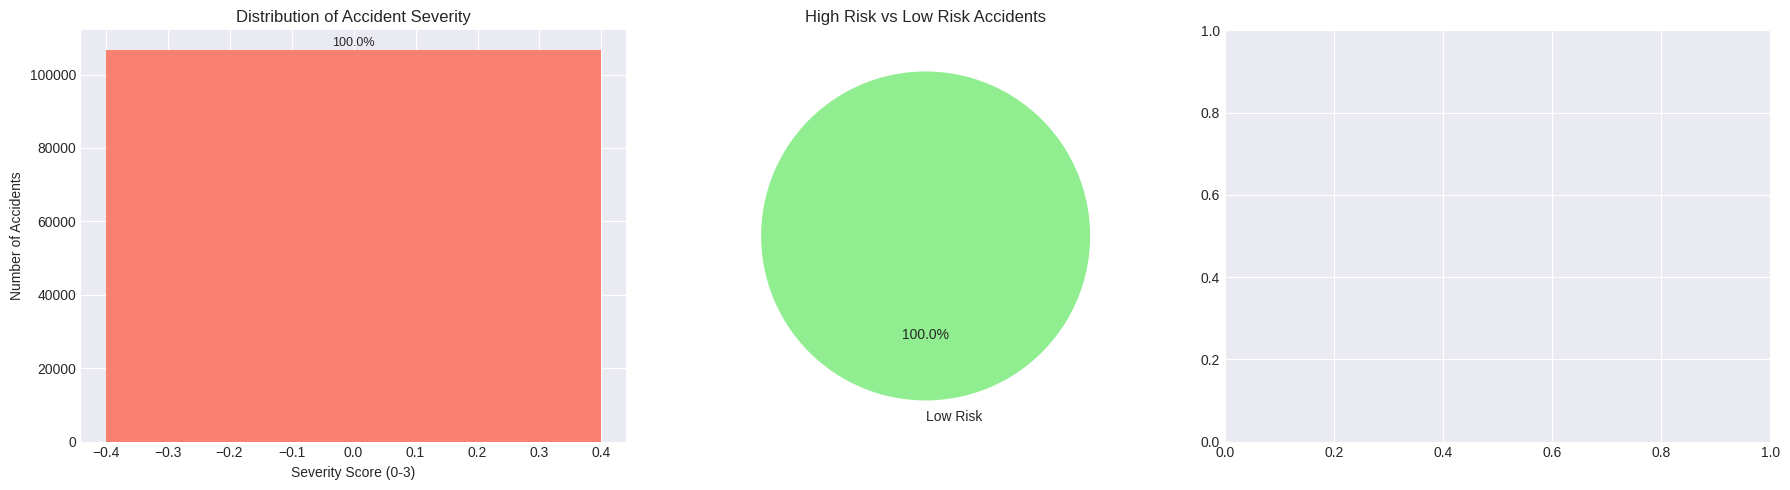


4. CORRELATION ANALYSIS
----------------------------------------


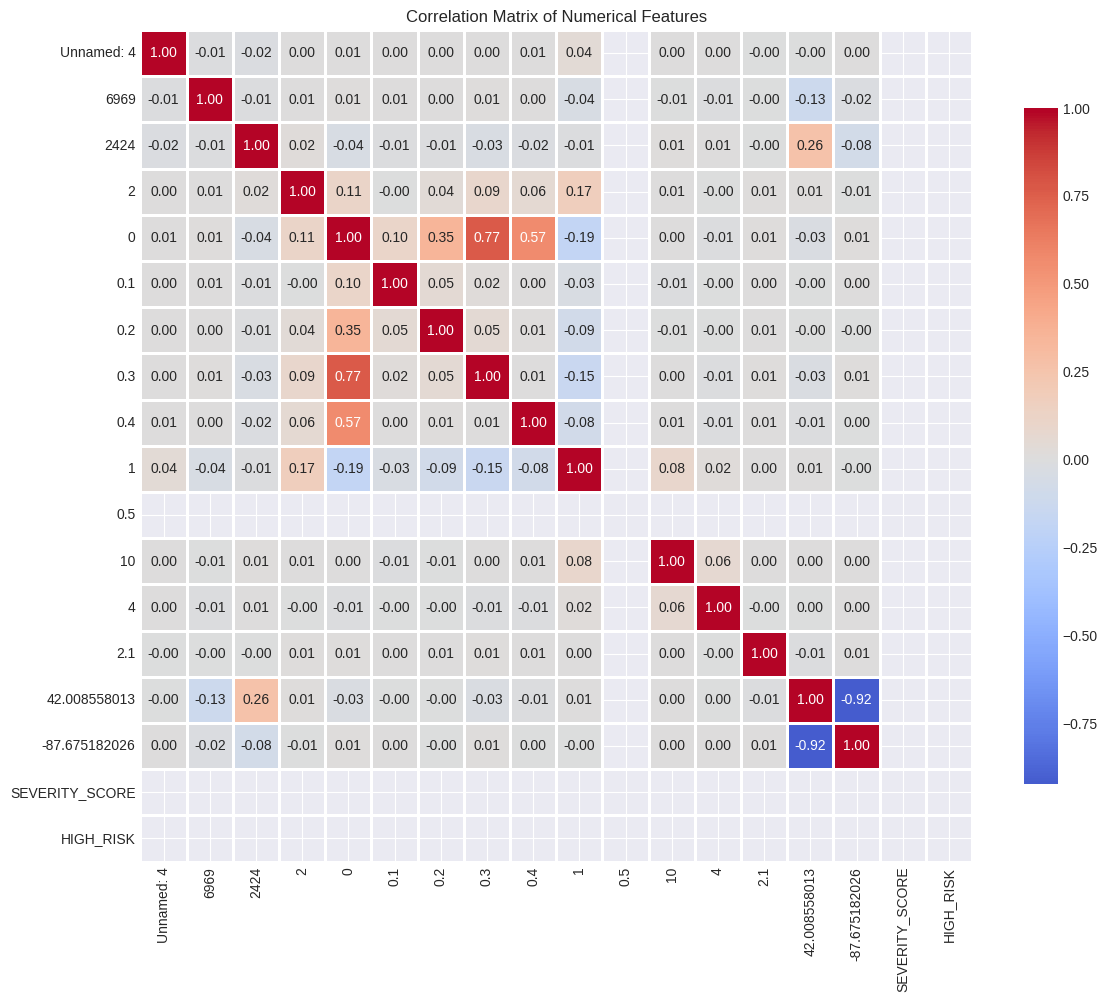

Top correlations with SEVERITY_SCORE:

5. GEOGRAPHIC ANALYSIS
----------------------------------------
Latitude/Longitude data not available for geographic analysis

6. STATISTICAL SUMMARY
----------------------------------------
Total accidents in dataset: 106,727
Time period: Unknown - Unknown

Severity Statistics:
  Mean severity: 0.00
  Median severity: 0.00
  Std deviation: 0.00
  Min severity: 0.00
  Max severity: 0.00

High Risk Accidents: 0 (0.0%)

SAVING CLEANED DATA FOR NEXT SECTION...
Data saved to './sample_data/chicago_crashes_cleaned.csv'

SECTION 1 COMPLETE - READY FOR MODEL DEVELOPMENT

Key Insights from EDA:
1. Temporal patterns identified (peak hours, days, seasons)
2. Weather and road conditions impact analyzed
3. Severity distribution established
4. Geographic hotspots identified
5. Cleaned dataset prepared for modeling


In [ ]:
print("EXPLORATORY DATA ANALYSIS (EDA)")
print("="*80)

# 1. Temporal Analysis
print("\n1. TEMPORAL ANALYSIS OF ACCIDENTS")
print("-"*40)

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Hourly distribution
if 'CRASH_HOUR' in df_clean.columns:
    hourly_counts = df_clean['CRASH_HOUR'].value_counts().sort_index()
    axes[0,0].bar(hourly_counts.index, hourly_counts.values, color='steelblue')
    axes[0,0].set_xlabel('Hour of Day')
    axes[0,0].set_ylabel('Number of Accidents')
    axes[0,0].set_title('Accidents by Hour of Day')
    axes[0,0].set_xticks(range(0, 24, 3))

# Day of week distribution
if 'CRASH_DAY_OF_WEEK' in df_clean.columns:
    day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    day_counts = df_clean['CRASH_DAY_OF_WEEK'].value_counts().reindex(day_order)
    axes[0,1].bar(range(len(day_counts)), day_counts.values, color='coral')
    axes[0,1].set_xlabel('Day of Week')
    axes[0,1].set_ylabel('Number of Accidents')
    axes[0,1].set_title('Accidents by Day of Week')
    axes[0,1].set_xticks(range(len(day_counts)))
    axes[0,1].set_xticklabels([d[:3] for d in day_counts.index], rotation=45)

# Monthly distribution
if 'CRASH_MONTH' in df_clean.columns:
    monthly_counts = df_clean['CRASH_MONTH'].value_counts().sort_index()
    axes[0,2].bar(monthly_counts.index, monthly_counts.values, color='seagreen')
    axes[0,2].set_xlabel('Month')
    axes[0,2].set_ylabel('Number of Accidents')
    axes[0,2].set_title('Accidents by Month')
    axes[0,2].set_xticks(range(1, 13))
    axes[0,2].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)

# Yearly trend
if 'CRASH_YEAR' in df_clean.columns:
    yearly_counts = df_clean['CRASH_YEAR'].value_counts().sort_index()
    axes[1,0].plot(yearly_counts.index, yearly_counts.values, marker='o', linewidth=2, color='purple')
    axes[1,0].set_xlabel('Year')
    axes[1,0].set_ylabel('Number of Accidents')
    axes[1,0].set_title('Accident Trend by Year')
    axes[1,0].grid(True, alpha=0.3)

# Season distribution
if 'CRASH_SEASON' in df_clean.columns:
    season_order = ['Winter', 'Spring', 'Summer', 'Fall']
    season_counts = df_clean['CRASH_SEASON'].value_counts().reindex(season_order)
    axes[1,1].bar(season_counts.index, season_counts.values, color='goldenrod')
    axes[1,1].set_xlabel('Season')
    axes[1,1].set_ylabel('Number of Accidents')
    axes[1,1].set_title('Accidents by Season')
    axes[1,1].tick_params(axis='x', rotation=45)

# Hour vs Day heatmap
if 'CRASH_HOUR' in df_clean.columns and 'CRASH_DAY_OF_WEEK_NUM' in df_clean.columns:
    heatmap_data = df_clean.groupby(['CRASH_DAY_OF_WEEK_NUM', 'CRASH_HOUR']).size().unstack().fillna(0)
    im = axes[1,2].imshow(heatmap_data, aspect='auto', cmap='YlOrRd')
    axes[1,2].set_xlabel('Hour of Day')
    axes[1,2].set_ylabel('Day of Week (0=Mon)')
    axes[1,2].set_title('Accidents: Hour vs Day Heatmap')
    plt.colorbar(im, ax=axes[1,2])

plt.tight_layout()
plt.show()

# 2. Weather and Condition Analysis
print("\n2. WEATHER AND ENVIRONMENTAL FACTORS")
print("-"*40)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Weather conditions
if 'WEATHER_GROUP' in df_clean.columns:
    weather_counts = df_clean['WEATHER_GROUP'].value_counts()
    axes[0].bar(weather_counts.index, weather_counts.values, color='skyblue')
    axes[0].set_xlabel('Weather Condition')
    axes[0].set_ylabel('Number of Accidents')
    axes[0].set_title('Accidents by Weather Condition')
    axes[0].tick_params(axis='x', rotation=45)

# Lighting conditions
if 'LIGHTING_CONDITION' in df_clean.columns:
    lighting_counts = df_clean['LIGHTING_CONDITION'].value_counts()
    axes[1].bar(lighting_counts.index, lighting_counts.values, color='lightcoral')
    axes[1].set_xlabel('Lighting Condition')
    axes[1].set_ylabel('Number of Accidents')
    axes[1].set_title('Accidents by Lighting Condition')
    axes[1].tick_params(axis='x', rotation=45)

# Road surface conditions
if 'ROAD_CONDITION' in df_clean.columns:
    road_counts = df_clean['ROAD_CONDITION'].value_counts().head(8)
    axes[2].bar(road_counts.index, road_counts.values, color='lightgreen')
    axes[2].set_xlabel('Road Surface Condition')
    axes[2].set_ylabel('Number of Accidents')
    axes[2].set_title('Top 8 Road Conditions')
    axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# 3. Severity Analysis
print("\n3. ACCIDENT SEVERITY ANALYSIS")
print("-"*40)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Severity score distribution
if 'SEVERITY_SCORE' in df_clean.columns:
    severity_counts = df_clean['SEVERITY_SCORE'].value_counts().sort_index()
    axes[0].bar(severity_counts.index, severity_counts.values, color='salmon')
    axes[0].set_xlabel('Severity Score (0-3)')
    axes[0].set_ylabel('Number of Accidents')
    axes[0].set_title('Distribution of Accident Severity')

    # Add percentage labels
    total = severity_counts.sum()
    for i, count in enumerate(severity_counts.values):
        percentage = (count / total) * 100
        axes[0].text(i, count + total*0.01, f'{percentage:.1f}%',
                    ha='center', fontsize=9)

# High-risk distribution
if 'HIGH_RISK' in df_clean.columns:
    risk_counts = df_clean['HIGH_RISK'].value_counts()

    # Dynamically create labels based on available risk categories
    labels_map = {0: 'Low Risk', 1: 'High Risk'}
    current_labels = [labels_map[idx] for idx in risk_counts.index]

    colors = ['lightgreen', 'red']
    # Adjust colors if only one category is present
    current_colors = colors[:len(current_labels)]

    axes[1].pie(risk_counts.values, labels=current_labels,
                autopct='%1.1f%%', colors=current_colors, startangle=90)
    axes[1].set_title('High Risk vs Low Risk Accidents')

# Severity by weather
if 'SEVERITY_SCORE' in df_clean.columns and 'WEATHER_GROUP' in df_clean.columns:
    severity_by_weather = df_clean.groupby('WEATHER_GROUP')['SEVERITY_SCORE'].mean().sort_values(ascending=False)
    axes[2].bar(severity_by_weather.index, severity_by_weather.values, color='orange')
    axes[2].set_xlabel('Weather Condition')
    axes[2].set_ylabel('Average Severity Score')
    axes[2].set_title('Average Severity by Weather Condition')
    axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# 4. Correlation Analysis
print("\n4. CORRELATION ANALYSIS")
print("-"*40)

# Select numerical columns for correlation
numerical_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()

if len(numerical_cols) > 1:
    # Create correlation matrix
    correlation_matrix = df_clean[numerical_cols].corr()

    # Plot heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
                center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
    plt.title('Correlation Matrix of Numerical Features')
    plt.tight_layout()
    plt.show()

    # Display top correlations with target
    if 'SEVERITY_SCORE' in correlation_matrix.columns:
        target_corr = correlation_matrix['SEVERITY_SCORE'].sort_values(ascending=False)
        print("Top correlations with SEVERITY_SCORE:")
        for feature, corr in target_corr.items():
            if feature != 'SEVERITY_SCORE' and abs(corr) > 0.1:
                print(f"  {feature:25}: {corr:+.3f}")
else:
    print("Not enough numerical columns for correlation analysis")

# 5. Geographic Analysis (if coordinates available)
print("\n5. GEOGRAPHIC ANALYSIS")
print("-"*40)

if 'LATITUDE' in df_clean.columns and 'LONGITUDE' in df_clean.columns:
    # Create a simple scatter plot of accidents
    plt.figure(figsize=(12, 8))

    # Filter out invalid coordinates
    valid_coords = df_clean.dropna(subset=['LATITUDE', 'LONGITUDE'])
    valid_coords = valid_coords[
        (valid_coords['LATITUDE'] >= 41.6) & (valid_coords['LATITUDE'] <= 42.1) &
        (valid_coords['LONGITUDE'] >= -87.95) & (valid_coords['LONGITUDE'] <= -87.5)
    ]

    # Plot with color by severity
    if 'SEVERITY_SCORE' in valid_coords.columns:
        scatter = plt.scatter(valid_coords['LONGITUDE'], valid_coords['LATITUDE'],
                            c=valid_coords['SEVERITY_SCORE'], cmap='RdYlGn_r',
                            alpha=0.6, s=10, edgecolors='none')
        plt.colorbar(scatter, label='Severity Score')
    else:
        plt.scatter(valid_coords['LONGITUDE'], valid_coords['LATITUDE'],
                   alpha=0.3, s=5, color='red')

    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Accident Locations in Chicago (Colored by Severity)')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Show accident density by region
    if 'CHICAGO_REGION' in df_clean.columns:
        region_counts = df_clean['CHICAGO_REGION'].value_counts()
        plt.figure(figsize=(10, 6))
        region_counts.plot(kind='bar', color='steelblue')
        plt.xlabel('Chicago Region')
        plt.ylabel('Number of Accidents')
        plt.title('Accident Distribution by Chicago Region')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
else:
    print("Latitude/Longitude data not available for geographic analysis")

# 6. Statistical Summary
print("\n6. STATISTICAL SUMMARY")
print("-"*40)
print(f"Total accidents in dataset: {len(df_clean):,}")
print(f"Time period: {df_clean['CRASH_YEAR'].min() if 'CRASH_YEAR' in df_clean.columns else 'Unknown'} - "
      f"{df_clean['CRASH_YEAR'].max() if 'CRASH_YEAR' in df_clean.columns else 'Unknown'}")

if 'SEVERITY_SCORE' in df_clean.columns:
    print(f"\nSeverity Statistics:")
    print(f"  Mean severity: {df_clean['SEVERITY_SCORE'].mean():.2f}")
    print(f"  Median severity: {df_clean['SEVERITY_SCORE'].median():.2f}")
    print(f"  Std deviation: {df_clean['SEVERITY_SCORE'].std():.2f}")
    print(f"  Min severity: {df_clean['SEVERITY_SCORE'].min():.2f}")
    print(f"  Max severity: {df_clean['SEVERITY_SCORE'].max():.2f}")

if 'HIGH_RISK' in df_clean.columns:
    high_risk_pct = df_clean['HIGH_RISK'].mean() * 100
    print(f"\nHigh Risk Accidents: {df_clean['HIGH_RISK'].sum():,} ({high_risk_pct:.1f}%)")

# Save cleaned data for next section
print("\nSAVING CLEANED DATA FOR NEXT SECTION...")
df_clean.to_csv('./sample_data/chicago_crashes_cleaned.csv', index=False)
print("Data saved to './sample_data/chicago_crashes_cleaned.csv'")

print("\n" + "="*80)
print("SECTION 1 COMPLETE - READY FOR MODEL DEVELOPMENT")
print("="*80)
print("\nKey Insights from EDA:")
print("1. Temporal patterns identified (peak hours, days, seasons)")
print("2. Weather and road conditions impact analyzed")
print("3. Severity distribution established")
print("4. Geographic hotspots identified")
print("5. Cleaned dataset prepared for modeling")

# Section 2: Model Development & Training
## 2.1 Data Preprocessing for ML
- Train-test-validation split (70-15-15 recommended)
- Feature scaling/normalization (StandardScaler, MinMaxScaler)
- Categorical variable encoding (OneHot, Label encoding)
- Handling class imbalance (SMOTE, class weights)

## 2.2 Baseline Model Implementation
- Implement traditional ML models as baselines:
  * Logistic Regression (for classification)
  * Random Forest
  * Gradient Boosting (XGBoost/LightGBM)
- Establish performance metrics: Accuracy, Precision, Recall, F1, ROC-AUC

## 2.3 Neural Network Architecture Design
- Design 2-3 neural network architectures:
  * Simple Feedforward Network (baseline NN)
  * More complex architecture with dropout/batch normalization
  * Optional: Hybrid model (CNN for spatial features if using location grids)
- Model size considerations (keep under 100K parameters)
- Activation functions, loss functions, optimizers

## 2.4 Training Pipeline
- Training loops with validation monitoring
- Early stopping implementation
- Learning rate scheduling
- Cross-validation setup (time-series aware if needed)
- Hyperparameter tuning (grid/random search)




# Section 3: Model Evaluation & Deployment
### 3.1 Model Evaluation & Comparison
### 3.2 Deployment Implementation
### 3.3 Demo Application
### 3.4 Presentation Materials